In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud

from wordcloud import WordCloud

In [2]:
red = pd.read_excel("Reddit_Title.xlsx")
tw_non = pd.read_excel("Twitter_Non-Advert.xlsx")

In [3]:
tw_non.rename(columns = {'text':'title'}, inplace = True)

In [4]:
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

merged_df = pd.merge(red,tw_non, how='outer')

merged_df.to_csv("Merged_Data.csv", index=False)

df = pd.read_csv("Merged_Data.csv")
df

,title,label
0,Ensuring basic necessities and mentalhealth s...,1
1,France Welcome Saint-Jean-de-Luz. eyes France...,0
2,National parks give a £5 trillion boost to me...,1
3,"Secrets of medicalintuitive healer , howto re...",0
4,The pandemic left many UK companies exposed a...,1
...,...,...
7602,“You’re faking your depression because you loo...,1
7603,…leads to a wide­spread re­duc­tion in ac­tiv­...,1
7604,……..,1
7605,♡ Just a puppy and her Dinosaur toy. Hope it m...,0


In [5]:
df.tail()

,title,label
7602,“You’re faking your depression because you loo...,1
7603,…leads to a wide­spread re­duc­tion in ac­tiv­...,1
7604,……..,1
7605,♡ Just a puppy and her Dinosaur toy. Hope it m...,0
7606,一Dignity and Grace Ruthism MentalHealth Stress...,1


In [6]:
df.shape

(7607, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7607 entries, 0 to 7606
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   7607 non-null   object
 1   label   7607 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.0+ KB


In [8]:
df.isna().sum()

title    0
label    0
dtype: int64

In [9]:
duplicates = df[df.duplicated()]
duplicates


,title,label
272,A loss of the hormone allopregnanolone linked ...,1
354,Adaptogens like echinacea and turmeric help pr...,1
360,Advice,1
561,Alone,1
602,And R we prepared 2 manage stronger hurricanes...,1
...,...,...
7358,idk,1
7412,lonely,1
7454,nature world arbaz73,1
7478,potential strategies for how to effectively ma...,1


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df = df.drop_duplicates(subset='title')

df =df[df['title'].str.strip().astype(bool)]

print(f"Number of rows after cleaning: {len(df)}")

Number of rows after cleaning: 7494


In [13]:

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isna(text) or text is None:
        return ""
    
    text = text.lower()
    
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text


df2=df.copy()
df2['Cleaned_Text'] = df['title'].apply(clean_text)
df2=df2.drop(columns=['title'])
df2.to_csv("Cleaned_Data.csv", index=False)
df2

,label,Cleaned_Text
0,1,ensuring basic necessities mentalhealth servic...
1,0,france welcome saintjeandeluz eyes france euro...
2,1,national parks give £5 trillion boost mentalhe...
3,0,secrets medicalintuitive healer howto reset st...
4,1,pandemic left many uk companies exposed vulner...
...,...,...
7602,1,“you’re faking depression look happy”
7603,1,…leads wide­spread re­duc­tion ac­tiv­ity acro...
7604,1,……
7605,0,♡ puppy dinosaur toy hope makes smile today♡


<Axes: xlabel='label'>

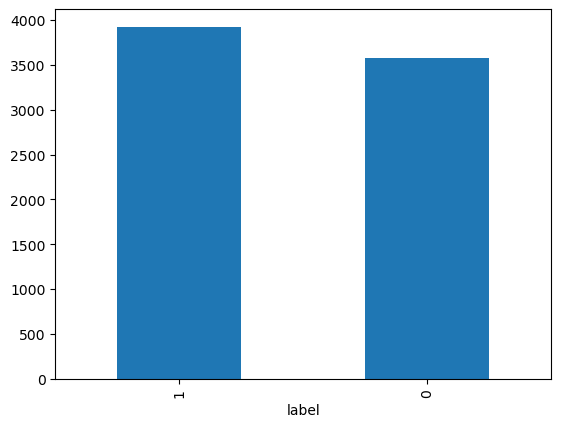

In [14]:
df['label'].value_counts().plot(kind='bar')

In [15]:
print(df2.isnull().sum())

label           0
Cleaned_Text    0
dtype: int64


In [16]:
df2.duplicated().sum()

np.int64(72)

In [17]:
duplicates = df2[df2.duplicated()]
duplicates.head(70)

,label,Cleaned_Text
42,1,speaknoevil monkey honest globe showing europe...
725,1,feeling stressed time side take deep breath jo...
1078,1,casually suicidal
1203,1,craigkellymp australia vaccinated people recei...
1738,1,feeling stressed
...,...,...
7368,1,im exhausted
7369,1,im overwhelmed
7378,1,depression
7411,1,lonely


In [18]:
df2.drop_duplicates(inplace=True)

In [19]:
df2.shape

(7422, 2)

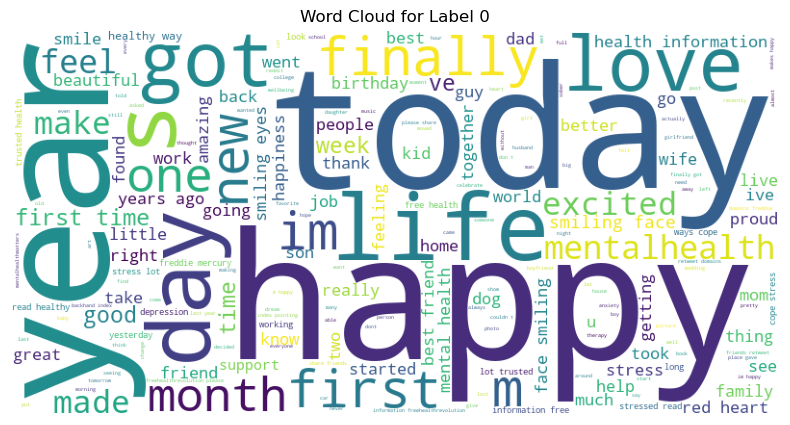

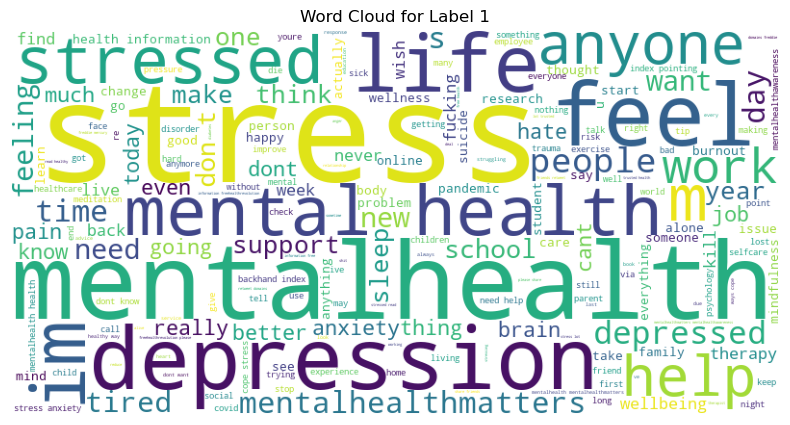

In [20]:
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

text_0 = " ".join(df2[df2['label'] == 0]['Cleaned_Text'])
text_1 = " ".join(df2[df2['label'] == 1]['Cleaned_Text'])

generate_word_cloud(text_0, "Word Cloud for Label 0")
generate_word_cloud(text_1, "Word Cloud for Label 1")

In [21]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

                                        Cleaned_Text  label  sentiment_scores
0  ensuring basic necessities mentalhealth servic...      1            0.8934
1  france welcome saintjeandeluz eyes france euro...      0            0.7783
2  national parks give £5 trillion boost mentalhe...      1            0.4019
3  secrets medicalintuitive healer howto reset st...      0           -0.4215
4  pandemic left many uk companies exposed vulner...      1            0.5994


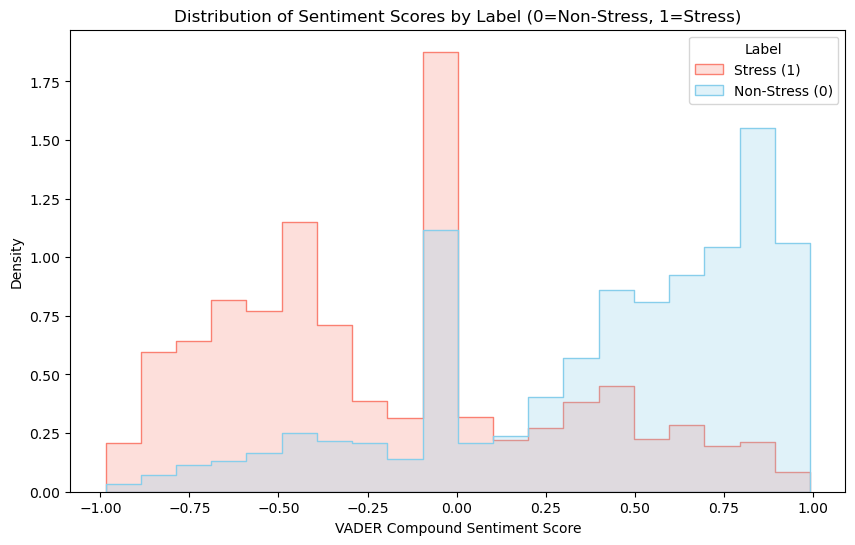

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
try:
    sia = SentimentIntensityAnalyzer()
    sia.lexicon
except LookupError:
    nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df2['sentiment_scores'] = df2['Cleaned_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

print(df2[['Cleaned_Text', 'label', 'sentiment_scores']].head())
plt.figure(figsize=(10, 6))
sns.histplot(
    df2, 
    x='sentiment_scores', 
    hue='label', 
    element="step", 
    stat="density", 
    common_norm=False, 
    palette=['skyblue', 'salmon']
)
plt.title('Distribution of Sentiment Scores by Label (0=Non-Stress, 1=Stress)')
plt.xlabel('VADER Compound Sentiment Score')
plt.ylabel('Density')
plt.legend(title='Label', labels=['Stress (1)', 'Non-Stress (0)'])
plt.show()


In [23]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
#import pyLDAvis.gensim_models as gensimvis
nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Downloading punkt")
    nltk.download('punkt', quiet=True)

try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    print("Downloading stopwords")
    nltk.download('stopwords', quiet=True)
    stop_words = set(stopwords.words('english'))

# Redefine preprocess to output a LIST OF TOKENS
def preprocess_for_lda(text):
    if pd.isna(text) or not isinstance(text, str):
        return []
    
    tokens = word_tokenize(text)
    
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df2['processed_tokens'] = df2['Cleaned_Text'].apply(preprocess_for_lda)
print(df2[['Cleaned_Text', 'processed_tokens']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                        Cleaned_Text  \
0  ensuring basic necessities mentalhealth servic...   
1  france welcome saintjeandeluz eyes france euro...   
2  national parks give £5 trillion boost mentalhe...   
3  secrets medicalintuitive healer howto reset st...   
4  pandemic left many uk companies exposed vulner...   

                                    processed_tokens  
0  [ensuring, basic, necessities, mentalhealth, s...  
1  [france, welcome, saintjeandeluz, eyes, france...  
2  [national, parks, give, trillion, boost, menta...  
3  [secrets, medicalintuitive, healer, howto, res...  
4  [pandemic, left, many, uk, companies, exposed,...  


In [24]:
# 1. Create Dictionary (Word-to-ID mapping)
dictionary = corpora.Dictionary(df2['processed_tokens'])

# Filter out extreme values (e.g., words too common or too rare)
dictionary.filter_extremes(no_below=10, no_above=0.5)

# 2. Create Corpus (Bag-of-Words / Document-Term Matrix)
corpus = [dictionary.doc2bow(text) for text in df2['processed_tokens']]

In [25]:
num_topics = 10

lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
     alpha='auto',
    per_word_topics=True
)


from pprint import pprint
print("\nTop 10 Topics and Keywords:")
pprint(lda_model.print_topics())


Top 10 Topics and Keywords:
[(0,
  '0.100*"anxiety" + 0.070*"therapy" + 0.030*"relax" + 0.027*"education" + '
  '0.025*"research" + 0.025*"everyone" + 0.024*"sleep" + 0.023*"also" + '
  '0.023*"exercise" + 0.023*"story"'),
 (1,
  '0.070*"mindfulness" + 0.058*"first" + 0.053*"face" + 0.050*"im" + '
  '0.048*"new" + 0.029*"smiling" + 0.021*"smile" + 0.021*"feeling" + '
  '0.020*"mentalhealthawareness" + 0.018*"great"'),
 (2,
  '0.057*"happy" + 0.045*"life" + 0.043*"today" + 0.034*"day" + 0.031*"time" + '
  '0.030*"love" + 0.028*"like" + 0.023*"feel" + 0.022*"want" + 0.022*"years"'),
 (3,
  '0.324*"stress" + 0.046*"read" + 0.029*"index" + 0.029*"pointing" + '
  '0.029*"backhand" + 0.023*"right" + 0.022*"ways" + 0.022*"brain" + '
  '0.015*"thoughts" + 0.015*"recovery"'),
 (4,
  '0.062*"stressed" + 0.059*"free" + 0.039*"makes" + 0.026*"really" + '
  '0.026*"world" + 0.024*"week" + 0.023*"freddie" + 0.023*"mercury" + '
  '0.020*"hope" + 0.019*"true"'),
 (5,
  '0.096*"meditation" + 0.061*"wo

In [26]:
df2['text_length'] = df2['Cleaned_Text'].apply(len)

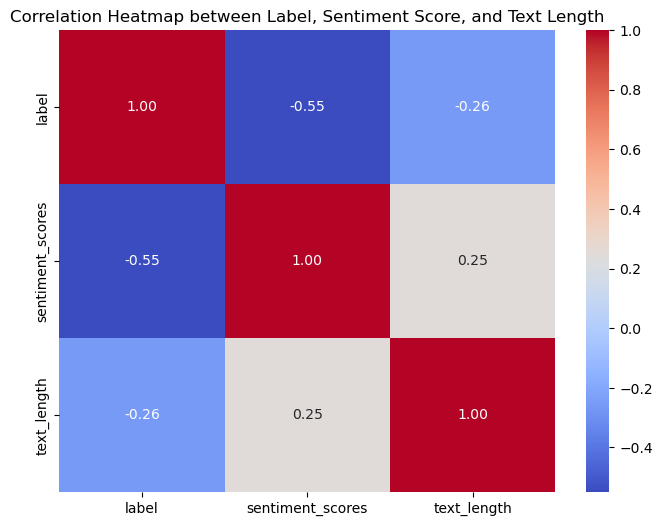

In [27]:
correlation_matrix = df2[['label', 'sentiment_scores', 'text_length']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap between Label, Sentiment Score, and Text Length')
plt.show()

In [28]:
df2

,label,Cleaned_Text,sentiment_scores,processed_tokens,text_length
0,1,ensuring basic necessities mentalhealth servic...,0.8934,"[ensuring, basic, necessities, mentalhealth, s...",208
1,0,france welcome saintjeandeluz eyes france euro...,0.7783,"[france, welcome, saintjeandeluz, eyes, france...",180
2,1,national parks give £5 trillion boost mentalhe...,0.4019,"[national, parks, give, trillion, boost, menta...",93
3,0,secrets medicalintuitive healer howto reset st...,-0.4215,"[secrets, medicalintuitive, healer, howto, res...",123
4,1,pandemic left many uk companies exposed vulner...,0.5994,"[pandemic, left, many, uk, companies, exposed,...",191
...,...,...,...,...,...
7602,1,“you’re faking depression look happy”,-0.7579,"[faking, depression, look, happy]",37
7603,1,…leads wide­spread re­duc­tion ac­tiv­ity acro...,-0.5423,"[across, brain, area, livemessy, mantra, stres...",225
7604,1,……,0.0000,[],2
7605,0,♡ puppy dinosaur toy hope makes smile today♡,0.6597,"[puppy, dinosaur, toy, hope, makes, smile]",44


In [29]:
#can delete 
print(df2.groupby('label')['sentiment_scores'].mean())

label
0    0.421343
1   -0.182822
Name: sentiment_scores, dtype: float64


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [31]:
X=df2['Cleaned_Text']
y=df2['label']

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_length = X.str.len().to_frame(name='text_length')
x_normalized = scaler.fit_transform(X_length)
x_normalized = pd.DataFrame(x_normalized, columns=X_length.columns, index=X.index)
print(x_normalized.head())

   text_length
0     0.560647
1     0.485175
2     0.250674
3     0.331536
4     0.514825


In [33]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42 )
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 7494
Number of rows in the training set: 5937
Number of rows in the test set: 1485


In [34]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print(f"Number of features (unique words in the vocabulary): {X_train_tfidf.shape[1]}")

Number of features (unique words in the vocabulary): 1000


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Logistic Rgression

In [36]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [37]:
y_pred = log_reg.predict(X_test_tfidf)

print("\nModel Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print("Train Score:", log_reg.score(X_train_tfidf, y_train))
print("Test Score:", log_reg.score(X_test_tfidf, y_test))


Model Evaluation
Accuracy: 0.8815

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       724
           1       0.87      0.91      0.89       761

    accuracy                           0.88      1485
   macro avg       0.88      0.88      0.88      1485
weighted avg       0.88      0.88      0.88      1485

Train Score: 0.9031497389253832
Test Score: 0.8814814814814815


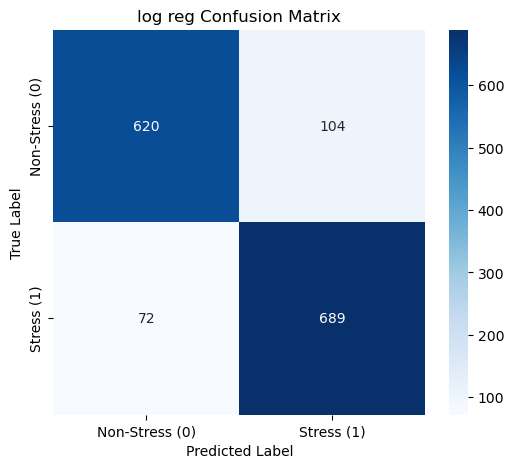

In [38]:
cm_log = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Stress (0)', 'Stress (1)'], 
            yticklabels=['Non-Stress (0)', 'Stress (1)'])
plt.title('log reg Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [39]:
feature_names = np.array(vectorizer.get_feature_names_out())
coefficients = log_reg.coef_[0]

feature_importance = pd.Series(coefficients, index=feature_names)

# Top 20 features most for Stress 
top_stress_features = feature_importance.sort_values(ascending=False).head(20)

# Top 20 features most for Non-Stress 
top_non_stress_features = feature_importance.sort_values(ascending=True).head(20)

print("\nTop 20 Features Predictive of STRESS (Class 1)")
print(top_stress_features)

print("\nTop 20 Features Predictive of NON-STRESS (Class 0)")
print(top_non_stress_features)


Top 20 Features Predictive of STRESS (Class 1)
stressed               3.924188
stress                 3.695446
depression             3.435297
tired                  3.305091
depressed              2.835931
kill                   2.612273
mentalhealth           2.550521
suicide                2.431314
fuck                   2.058314
fucking                1.990857
hate                   1.879599
anymore                1.803736
feel                   1.711890
die                    1.631817
want                   1.616265
mentalhealthmatters    1.615037
advice                 1.609069
killed                 1.583602
killing                1.542920
suicidal               1.418592
dtype: float64

Top 20 Features Predictive of NON-STRESS (Class 0)
happy       -5.422013
finally     -4.317561
excited     -4.266839
today       -3.823062
years       -3.708351
got         -3.385950
smile       -3.051671
love        -2.904642
smiling     -2.831616
months      -2.759599
year        -2.667335
gre

linear svc

In [40]:
predictions=log_reg.predict(X_test_tfidf)

In [41]:
svm_model = LinearSVC(C=1.0, random_state=42, max_iter=1000)

svm_model.fit(X_train_tfidf, y_train)

LinearSVC(random_state=42)

In [42]:
y_pred_svm = svm_model.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))
print("Train Score:", svm_model.score(X_train_tfidf, y_train))
print("Test Score:", svm_model.score(X_test_tfidf, y_test))

Accuracy: 0.8808
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       724
           1       0.87      0.90      0.89       761

    accuracy                           0.88      1485
   macro avg       0.88      0.88      0.88      1485
weighted avg       0.88      0.88      0.88      1485

Train Score: 0.9290887653697153
Test Score: 0.8808080808080808


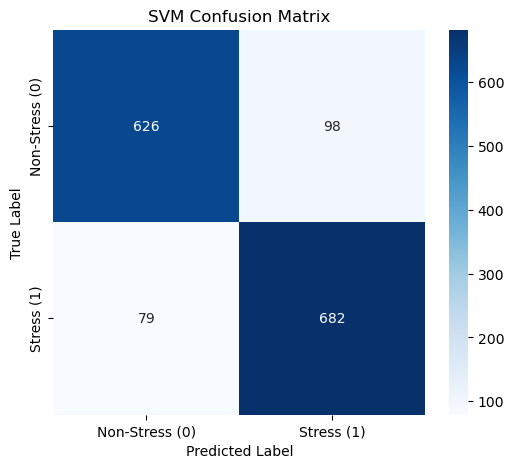

In [43]:
cm = confusion_matrix(y_test, y_pred_svm)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Stress (0)', 'Stress (1)'], 
            yticklabels=['Non-Stress (0)', 'Stress (1)'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
feature_names = np.array(vectorizer.get_feature_names_out())
coefficients = svm_model.coef_[0]

feature_importance_svm = pd.Series(coefficients, index=feature_names)

top_stress_features_svm = feature_importance_svm.sort_values(ascending=False).head(20)

top_non_stress_features_svm = feature_importance_svm.sort_values(ascending=True).head(20)

print("\nSVM Top 20 Features Predictive of STRESS (Class 1)")
print(top_stress_features_svm)

print("\nSVM Top 20 Features Predictive of NON-STRESS (Class 0)")
print(top_non_stress_features_svm)


SVM Top 20 Features Predictive of STRESS (Class 1)
stressed        3.133716
kill            2.213818
tired           2.184139
fuck            1.968408
suicide         1.953338
auspol          1.793446
risk            1.550251
depressed       1.538361
avoid           1.525852
stress          1.500013
killed          1.479814
fatigue         1.465314
fucking         1.438693
depression      1.425668
tokyo2020       1.409700
psychiatrist    1.367638
killing         1.278286
mentalhealth    1.240775
advice          1.221920
die             1.220969
dtype: float64

SVM Top 20 Features Predictive of NON-STRESS (Class 0)
happy        -2.597259
happier      -2.346834
finally      -2.343190
glad         -2.290209
beautiful    -2.282460
excited      -2.241419
smile        -2.074653
simple       -2.053695
son          -2.034892
confident    -1.939129
resilience   -1.937576
welcome      -1.868903
perfect      -1.850167
proud        -1.804616
love         -1.772668
dance        -1.755465
cute     

Random Forest

In [45]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10,min_samples_split=5,min_samples_leaf=2, random_state=42, class_weight='balanced')

rf_model.fit(X_train_tfidf, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)


Random Forest Model Evaluation
Accuracy: 0.8330

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       724
           1       0.79      0.92      0.85       761

    accuracy                           0.83      1485
   macro avg       0.84      0.83      0.83      1485
weighted avg       0.84      0.83      0.83      1485



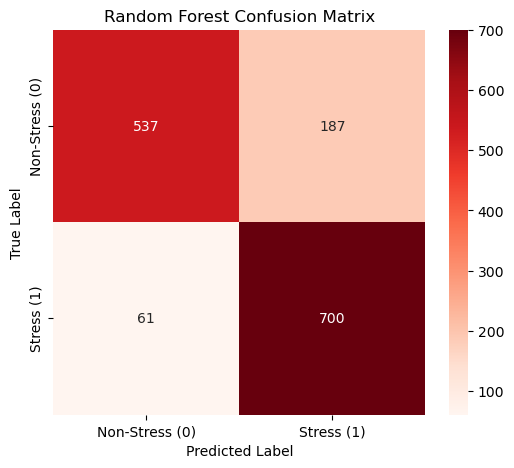

Train Score: 0.844028970860704
Test Score: 0.832996632996633


In [46]:
y_pred_rf = rf_model.predict(X_test_tfidf)

print("\nRandom Forest Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


cm_rf = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Non-Stress (0)', 'Stress (1)'], 
            yticklabels=['Non-Stress (0)', 'Stress (1)'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Train Score:", rf_model.score(X_train_tfidf, y_train))
print("Test Score:", rf_model.score(X_test_tfidf, y_test))

XG Boost

In [47]:
xgb_model = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=42
)

xgb_model.fit(X_train_tfidf, y_train)

c:\Users\LOQ\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:05:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


XGBoost Model Evaluation 
Accuracy: 0.8303

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       724
           1       0.78      0.93      0.85       761

    accuracy                           0.83      1485
   macro avg       0.84      0.83      0.83      1485
weighted avg       0.84      0.83      0.83      1485



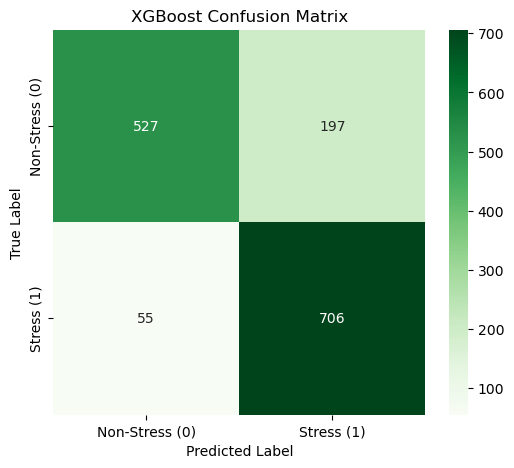

Train Score: 0.8704733030149907
Test Score: 0.8303030303030303


In [48]:

y_pred_xgb = xgb_model.predict(X_test_tfidf)

print("\nXGBoost Model Evaluation ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


cm_xgb = confusion_matrix(y_test, y_pred_xgb)


plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Non-Stress (0)', 'Stress (1)'], 
            yticklabels=['Non-Stress (0)', 'Stress (1)'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Train Score:", xgb_model.score(X_train_tfidf, y_train))
print("Test Score:", xgb_model.score(X_test_tfidf, y_test))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 96, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,370,369 (5.23 MB)

 Trainable params: 1,370,369 (5.23 MB)

 Non-trainable params: 0 (0.00 B)

None

Starting Training...
Epoch 1/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8019 - loss: 0.4337 - val_accuracy: 0.8855 - val_loss: 0.2741
Epoch 2/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9389 - loss: 0.1779 - val_accuracy: 0.8976 - val_loss: 0.2706
Epoch 3/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9810 - loss: 0.0638 - val_accuracy: 0.8923 - val_loss: 0.2974
Epoch 4/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9911 - loss: 0.0317 - val_accuracy: 0.8929 - val_loss: 0.3700


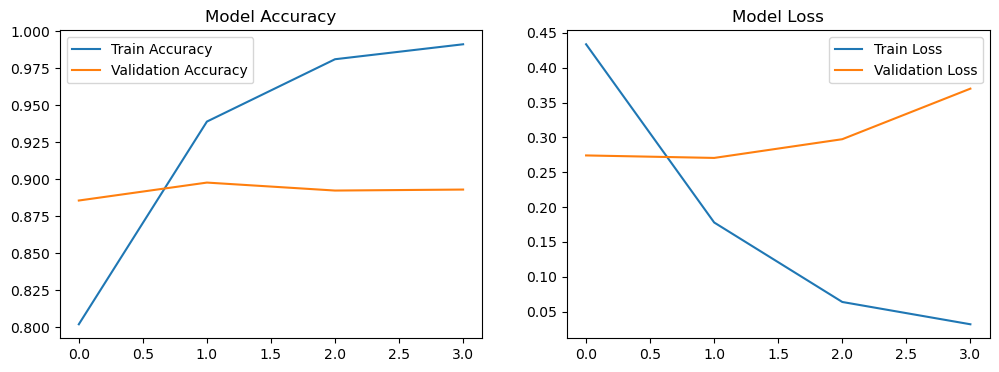

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

#1. Data Preparation (Tokenization & Padding) 
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df2['Cleaned_Text'])

sequences = tokenizer.texts_to_sequences(df2['Cleaned_Text'])
X_cnn = pad_sequences(sequences, maxlen=max_len)
y_cnn = df2['label'].values

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

# 2. CNN Model Building 
model = Sequential([
    Input(shape=(max_len,)), 
    Embedding(input_dim=max_words, output_dim=128),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 3. CNN Training with Early Stopping 
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=2, 
    restore_best_weights=True
)

history = model.fit(
    X_train_c, y_train_c,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_c, y_test_c),
    callbacks=[early_stop]
)

# 4. Plotting Results 
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [ ]:
# PART: Real-Time Prediction

def predict_stress(user_text, model_to_use):
    # 1. Clean the input text 
    cleaned_tokens = preprocess_for_lda(user_text) 
    cleaned_input_string = " ".join(cleaned_tokens)
    if not cleaned_input_string.strip():
        return "Please enter a valid English sentence."
    # 2. Vectorize the input 
    vectorized_input = vectorizer.transform([cleaned_input_string])
    
    # 3. Predict using the selected model
    prediction = model_to_use.predict(vectorized_input)
    
    # 4. Get probability 
    probability = model_to_use.predict_proba(vectorized_input)
    confidence = np.max(probability) * 100
    
    # 5. Output Results
    if prediction[0] == 1:
        return f"Prediction: STRESS (1) \nConfidence: {confidence:.2f}%"
    else:
        return f"Prediction: NON-STRESS (0) \nConfidence: {confidence:.2f}%"

print("Stress Detection System ")
user_input = input("Enter your text here to analyze: ")

print("\n" + "="*30)
print(predict_stress(user_input, log_reg))
print("="*30)

--- Stress Detection System is Ready ---

Prediction: NON-STRESS (0) 
Confidence: 50.09%


#to test the model

- My head is spinning and I can't stop thinking about tomorrow's presentation. (stress)
- Exams are over and I can finally breathe again, what a beautiful day. (non stress)
- The word stress is not in my dictionary today. (non stress) 

In [56]:
!pip install pipreqsnb

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pipreqsnb: filename=pipreqsnb-0.2.4-py3-none-any.whl size=4146 sha256=1e252849fcbd283742f69c51c5a1b7382997f1b03b20a52a49f527da20083e5d
  Stored in directory: c:\users\loq\appdata\local\pip\cache\wheels\d0\a0\1e\3a1100bc986487f3ff06fbdaf81a1024b0f1c26fdb2b34d273
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13775 sha256=d8110d76fa8f0e1758441e67ca07f65febb275173b62179b3f4079adfa262a65
  Stored in directory: c:\users\loq\appdata\local\pip\cache\wheels\0b\1d\03\175286677fb5a1341cc3e4755bf8ec0ed08f3329afd67446b0
Successfully built pipreqsnb docopt

   ---------------------------------------- 4/4 [pipreqsnb]



  DEPRECATION: Building 'pipreqsnb' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pipreqsnb'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'docopt' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'docopt'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [ ]:
import joblib

# 1. Save the Vectorizer 
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# 2. Save all classical models
joblib.dump(log_reg, 'logit_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')

print("All models and vectorizer saved successfully!")

All models and vectorizer saved successfully!


In [59]:
import streamlit as st

In [ ]:
%%writefile app.py

import streamlit as st
import joblib
import re
import string

# --- Page Configuration ---
st.set_page_config(page_title="Stress Detection System", layout="centered")
st.image("https://img.icons8.com/fluency/48/000000/stress.png", width=50)
# --- Function to Clean Text ---
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

# --- Load Assets ---
@st.cache_resource # To load models only once and save memory
def load_assets():
    vectorizer = joblib.load('tfidf_vectorizer.pkl')
    models = {
        "XGBoost": joblib.load('xgb_model.pkl'),
        "SVM": joblib.load('svm_model.pkl'),
        "Logistic Regression": joblib.load('logit_model.pkl'),
        "Random Forest": joblib.load('rf_model.pkl')
    }
    return vectorizer, models

vectorizer, models = load_assets()

# --- UI Layout ---
st.title("Stress Detection Hub")
st.write("Detect stress levels in text using multiple Machine Learning models.")

# Model Selection Dropdown
selected_model_name = st.selectbox("Select a Model for Prediction:", list(models.keys()))

# Text Input
user_input = st.text_area("Enter the text to be analyzed:", height=150)

if st.button("Analyze Sentiment"):
    if user_input.strip() == "":
        st.warning("Please enter some text first.")
    else:
        # 1. Preprocess
        cleaned_input = clean_text(user_input)
        
        # 2. Vectorize
        vectorized_input = vectorizer.transform([cleaned_input])
        
        # 3. Predict
        current_model = models[selected_model_name]
        prediction = current_model.predict(vectorized_input)[0]
        
        # 4. Display Result
        st.divider()
        if prediction == 1:
            st.error(f"**Result from {selected_model_name}: Stress Detected**")
        else:
            st.success(f"**Result from {selected_model_name}: No Stress Detected**")

st.info("Note: This tool is for project demonstration purposes and uses 4 different ML architectures.")

Writing app.py


In [64]:
! streamlit run app.py

^C
